## **Part0. Install**

### setting MMDetection (설치)

In [ ]:
# Check nvcc version 고명금 바보
!nvcc -V
# Check GCC version
!gcc --version

# install dependencies
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git -b dev-3.x
%cd mmdetection

%pip install -e .

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
Cloning into 'mmdetection'...
remote: Enumerating objects: 37980, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 37980 (delta 19), reused 45 (delta 13), pack-reused 37917
Receiving objects: 100% (37980/37980), 63.27 MiB | 25.06 MiB/s, done.
Resolving deltas: 100% (26168/26168), done.
/content/mmdetection

In [ ]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmdet


def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['MMDetection'] = f'{mmdet.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
CUDA available: True
numpy_random_seed: 2147483648
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 12.2, V12.2.140
GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
PyTorch: 2.1.0+cu121
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 64f6bcbcbab628e96f33a62c3e975f8535a7bde4)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX512
  - CUDA Runtime 12.1
  - NVCC architecture flags: -gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_

In [ ]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir ./checkpoints
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 88.6 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content/mmdetection/mmdetection/checkpoints
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content/mmdetection/mmdetection/checkpoints


### setting sam (설치)

In [ ]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import sys
import torch
import os
from google.colab.patches import cv2_imshow

In [ ]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx # save masks in COCO format

In [ ]:
!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [ ]:
HOME = "{HOME}"

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

{HOME}/weights/sam_vit_h_4b8939.pth ; exist: True


In [ ]:
first_run = True
if first_run:
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-gy674sst
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-gy674sst
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
--2024-01-06 08:03:17--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.70, 13.227.219.59, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   240MB/s    in 21s     

2024-01-06 08:03:37 (119 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

# **(필수)파일명**

In [ ]:
specific_name = '5'

# **전반부**

## **Part1. MMDetection**

### image inference

In [ ]:
from mmdet.apis import DetInferencer

# Choose to use a config
model_name = 'rtmdet_tiny_8xb32-300e_coco'
# Setup a checkpoint file to load
checkpoint = './checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

Loads checkpoint by local backend from path: ./checkpoints/rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


Output()

.config
2.jpeg
mmdetection
3.jpeg
result_3.png
cosinescore.csv
.ipynb_checkpoints
5.jpeg


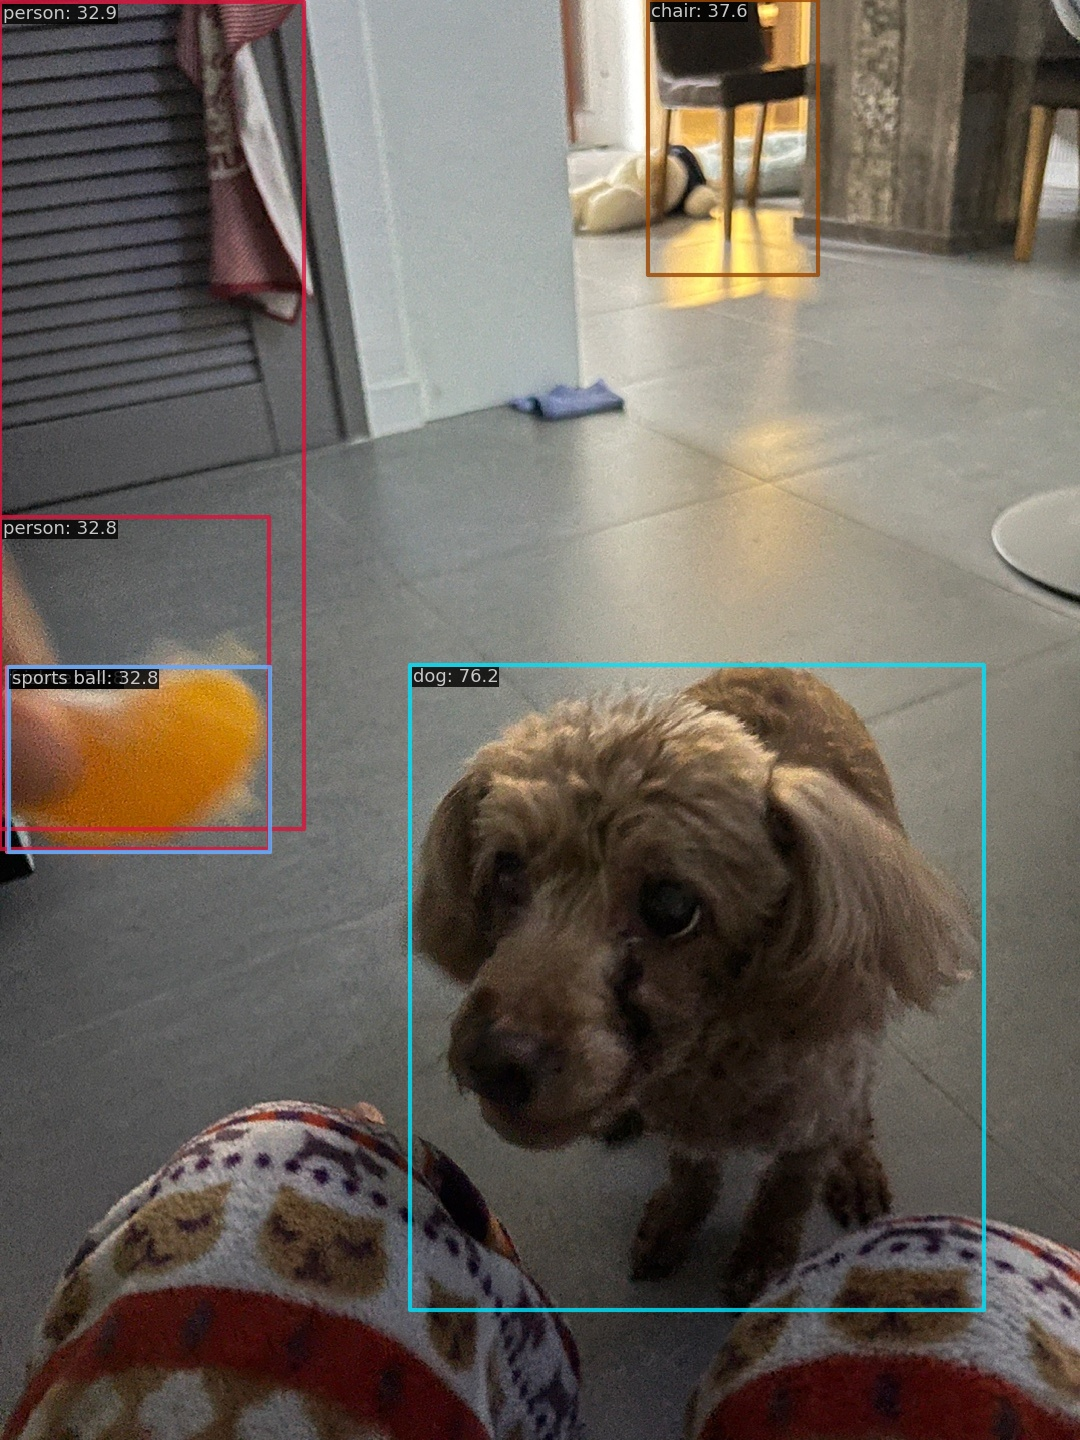

result_2.png
sample_data
1.jpeg
result_1.png


"\n# Use the detector to do inference\nimg = '/content/kitchen.png'\nresult = inferencer(img, out_dir='./output')\n\n# img에서 filename이랑 확장자 뽑기\nimg_name, img_extension = os.path.splitext(os.path.basename(img))\noutput_img_path = os.path.join('./output/vis', f'{img_name}{img_extension}')\nprint(output_img_path)\n\n# Show the output image\nImage.open(output_img_path)\n"

In [ ]:
import os
from PIL import Image
from IPython.display import display

# 디렉토리 안에 있는 이미지에 대해 inference하게 수정
input_dir = '/content/'

import os

for filename in os.listdir(input_dir):
  print(filename)
  if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
    img_name, extension = os.path.splitext(filename)

    if img_name == specific_name:
        img_path = os.path.join(input_dir, filename)
        result = inferencer(img_path, out_dir='./output')

        output_img_path = os.path.join('./output/vis', f'{img_name}{extension}')

        img_output = Image.open(output_img_path)
        display(img_output)


"""
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
        img_path = os.path.join(input_dir, filename)
        result = inferencer(img_path, out_dir='./output')

        img_name, img_extension = os.path.splitext(filename)
        output_img_path = os.path.join('./output/vis', f'{img_name}{img_extension}')

        img_output = Image.open(output_img_path)
        display(img_output)
"""

'''
# Use the detector to do inference
img = '/content/kitchen.png'
result = inferencer(img, out_dir='./output')

# img에서 filename이랑 확장자 뽑기
img_name, img_extension = os.path.splitext(os.path.basename(img))
output_img_path = os.path.join('./output/vis', f'{img_name}{img_extension}')
print(output_img_path)

# Show the output image
Image.open(output_img_path)
'''

In [ ]:
class_names = {
    0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat',
    9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat',
    16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack',
    25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball',
    33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket',
    39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple',
    48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake',
    56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop',
    64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink',
    72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier',
    79: 'toothbrush'}

mmd_predictions = result['predictions'][0]
mmd_class_indices = mmd_predictions['labels']
mmd_boxes = mmd_predictions['bboxes']
mmd_scores = mmd_predictions['scores']

for i in range(len(mmd_class_indices)):
    if mmd_scores[i] > 0.3:
        index = i
        class_label = mmd_class_indices[i]
        bounding_box = mmd_boxes[i]
        score = mmd_scores[i]
        class_name = class_names[class_label] if class_label in class_names else 'Unknown'
        print(f"Index: {index}, Class Label: {class_label}, Class Name: {class_name}, Bounding Box: {bounding_box}, Score: {score}")

Index: 0, Class Label: 16, Class Name: dog, Bounding Box: [409.8382568359375, 665.335693359375, 983.56005859375, 1309.6724853515625], Score: 0.7615811824798584
Index: 1, Class Label: 29, Class Name: frisbee, Bounding Box: [6.505382537841797, 667.2886352539062, 269.9442138671875, 852.0978393554688], Score: 0.5481431484222412
Index: 2, Class Label: 56, Class Name: chair, Bounding Box: [647.7666625976562, 0.0, 817.8397827148438, 275.1204833984375], Score: 0.3762122690677643
Index: 3, Class Label: 0, Class Name: person, Bounding Box: [0.0, 2.068279266357422, 304.440185546875, 829.3388061523438], Score: 0.32930612564086914
Index: 4, Class Label: 0, Class Name: person, Bounding Box: [0.0, 517.4356689453125, 268.7604675292969, 849.2167358398438], Score: 0.3284984827041626
Index: 5, Class Label: 32, Class Name: sports ball, Bounding Box: [8.876317977905273, 666.6271362304688, 269.5474853515625, 852.1198120117188], Score: 0.32809942960739136


In [ ]:
mmd_info = []

for i, class_index in enumerate(mmd_class_indices):
    if mmd_scores[i] > 0.34:  # 0.34 넘는 것만 가져오기
        index = i
        class_name = class_names[class_index]
        bounding_box = mmd_boxes[i]
        box_center = [
            (mmd_boxes[i][0] + mmd_boxes[i][2]) / 2,  # x좌표 중심
            (mmd_boxes[i][1] + mmd_boxes[i][3]) / 2   # y좌표 중심
        ]

        mmd_info.append({
            'index': index,
            'class_name': class_name,
            'box_center': box_center,
            'bounding_box': bounding_box,
            'class_index': class_index,
            'score': mmd_scores[i]
        })

for info in mmd_info:
    print(f"Index: {info['index']}, {info['class_name']}, Class Index: {info['class_index']}, Box Center: {info['box_center']}, Bounding Box: {info['bounding_box']}, Score: {info['score']}")

Index: 0, dog, Class Index: 16, Box Center: [696.6991577148438, 987.5040893554688], Bounding Box: [409.8382568359375, 665.335693359375, 983.56005859375, 1309.6724853515625], Score: 0.7615811824798584
Index: 1, frisbee, Class Index: 29, Box Center: [138.22479820251465, 759.6932373046875], Bounding Box: [6.505382537841797, 667.2886352539062, 269.9442138671875, 852.0978393554688], Score: 0.5481431484222412
Index: 2, chair, Class Index: 56, Box Center: [732.80322265625, 137.56024169921875], Bounding Box: [647.7666625976562, 0.0, 817.8397827148438, 275.1204833984375], Score: 0.3762122690677643


### overlapping function

In [ ]:
# input coords 얻기
import os
import base64
from google.colab import output
from IPython.display import HTML, display
import time

def initialize_coords():
    return []

def encode_image(image_path):
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    encoded = base64.b64encode(image_bytes).decode('utf-8')
    return f'data:image/png;base64,{encoded}'

def create_click_handler(img_path, input_coords):
    return f"""
    <script>
    function handle_click(event) {{
        var rect = document.getElementById('image').getBoundingClientRect();
        var x = event.clientX - rect.left;
        var y = event.clientY - rect.top;
        var coordinates = [x, y];
        google.colab.kernel.invokeFunction('notebook.click_handler', coordinates, {{}});
    }}

    document.querySelector('#image').addEventListener('click', handle_click);
    </script>
    """

def register_click_handler(img_path, input_coords):
    def click_handler(x, y):
        input_coords.clear()
        input_coords.extend([x, y])
        print(f'Clicked at coordinates: {input_coords}')

    output.register_callback('notebook.click_handler', click_handler)

# **(필수)좌표선택**


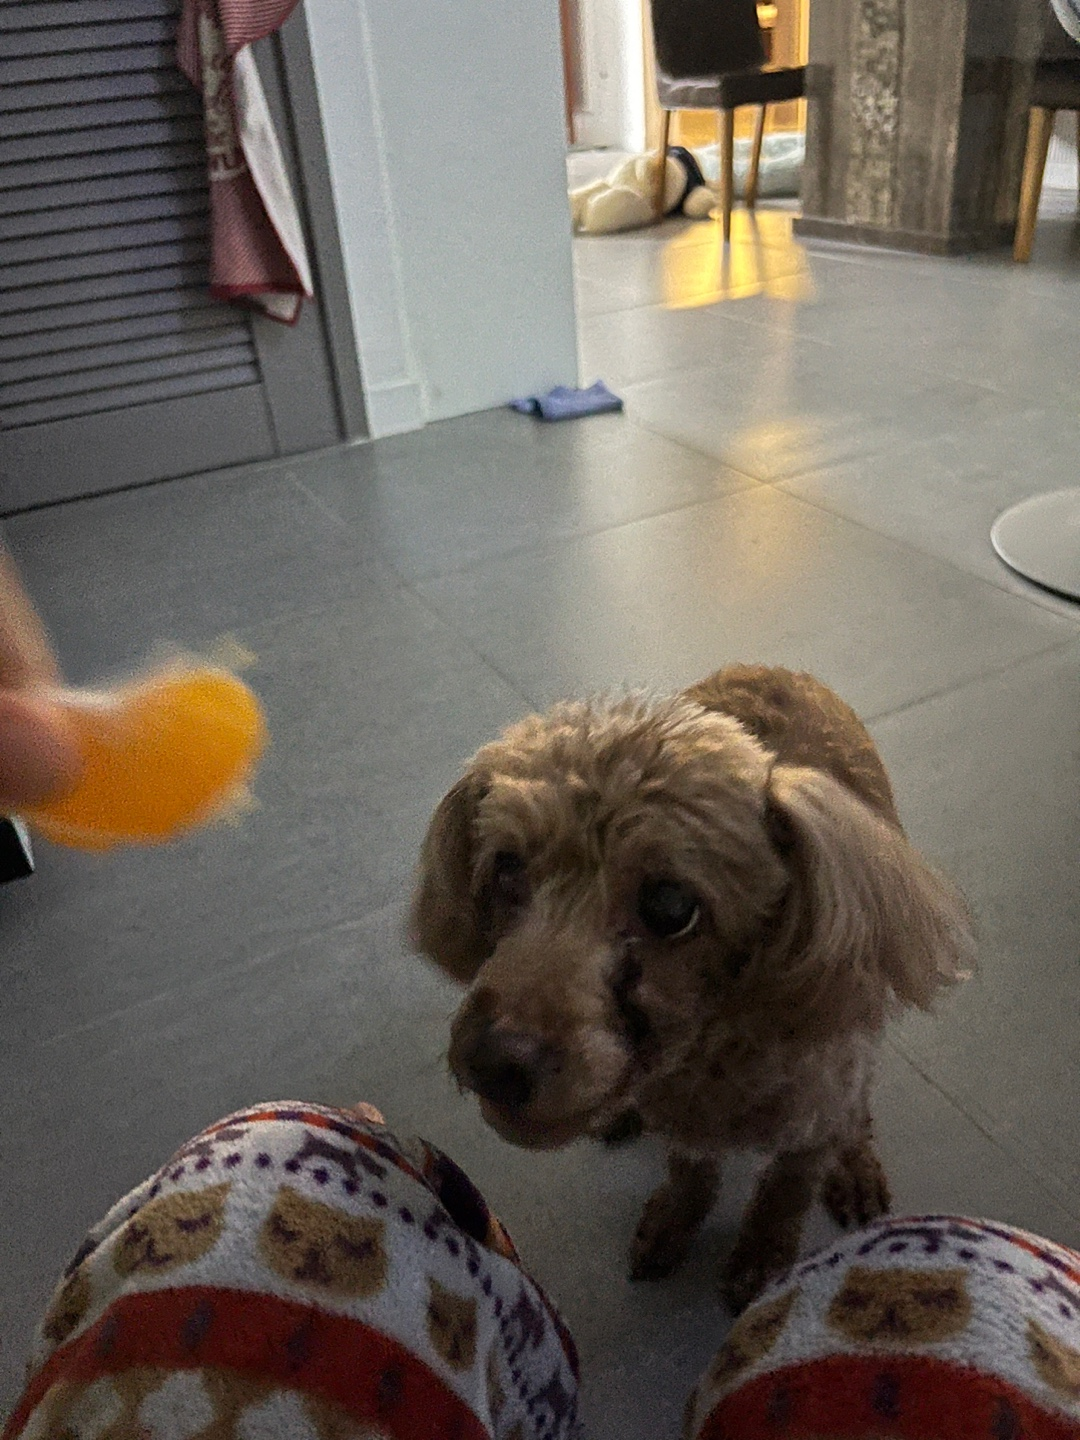

Clicked at coordinates: [661, 869]


In [ ]:
# 디렉토리 안에서 처리
for filename in os.listdir(input_dir):
    if specific_name == os.path.splitext(filename)[0] and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):

        img_path = os.path.join(input_dir, filename)

        input_coords = initialize_coords()

        image_html = f'<div id="image-container" style="position:relative;"><img id="image" src="{encode_image(img_path)}" style="cursor: crosshair;"></div>'
        display(HTML(image_html))

        click_handler_code = create_click_handler(img_path, input_coords)
        display(HTML(click_handler_code))

        input_class_info = None

        register_click_handler(img_path, input_coords)

# **후반부**

### 오버랩 찾기

In [ ]:
print(input_coords)

[661, 869]


In [ ]:
# input 좌표가 들어오면 클래스, bboxes 찾기
def find_class_by_coords(input_coordinates, mmd_info):
  possible = []
  for info in mmd_info:
      x_min, y_min, x_max, y_max = info['bounding_box']
      if x_min <= input_coordinates[0] <= x_max and y_min <= input_coordinates[1] <= y_max:
          possible.append([info['index'], info['class_name'], info['class_index'], info['bounding_box']])
  if len(possible) == 1:
    return possible[0][0], possible[0][1], possible[0][2], possible[0][3]
  elif len(possible) == 0:
    return None
  else:
    areas = []
    for i in possible:
      length = abs(i[-1][0]-i[-1][2])/2
      height = abs(i[-1][1]-i[-1][3])/2
      areas.append(length*height)
    k = areas.index(min(areas))
    return possible[k][0], possible[k][1], possible[k][2], possible[k][3]

input_class_info = find_class_by_coords(input_coords, mmd_info)
print(input_class_info)

# input 좌표에 따른 index 변수
selected_index = input_class_info[0]

(0, 'dog', 16, [409.8382568359375, 665.335693359375, 983.56005859375, 1309.6724853515625])


In [ ]:
# box overlap되는지 체크하기
def boxes_overlap(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    if (x1_max >= x2_min and x2_max >= x1_min and y1_max >= y2_min and y2_max >= y1_min):
        return True
    else:
        return False

In [ ]:
#input_class_info랑 mmd_info 사용해서 bounding box overlap인지 체크하기

def find_overlap_boxes(input_info, all_info):
    overlap_info = []
    input_index, input_class_index, input_class_name, input_bounding_box = input_info

    for info in all_info:
        if info['class_index'] != input_class_index and boxes_overlap(input_bounding_box, info['bounding_box']):
            overlap_info.append(info)

    return overlap_info

In [ ]:
# 좌표를 input으로 체크해보기
'''input_class_info = find_class_by_coords(input_coords, mmd_info)
이 순서대로 입니다 input_index, input_class_name, input_class_index, input_bbox)'''

if input_class_info[0] is not None:
    overlapping_boxes = find_overlap_boxes(input_class_info, mmd_info)

    if not overlapping_boxes:
        print("No overlapping boxes found.")
    else:
        print(f"Overlapping boxes for Index: {input_class_info[0]}, {input_class_info[1]} (Class Index {input_class_info[2]}):")
        for info in overlapping_boxes:
            print(f"  Index: {info['index']}, {info['class_name']} (Class Index: {info['class_index']}), Bounding Box: {info['bounding_box']}")
else:
    print("Input coordinates do not belong to any class in mmd_info.")

Overlapping boxes for Index: 0, dog (Class Index 16):
  Index: 0, dog (Class Index: 16), Bounding Box: [409.8382568359375, 665.335693359375, 983.56005859375, 1309.6724853515625]


In [ ]:
print(input_class_info)

(0, 'dog', 16, [409.8382568359375, 665.335693359375, 983.56005859375, 1309.6724853515625])


In [ ]:
def find_class_and_overlap(input_coordinates, all_info):
    def boxes_overlap(box1, box2):
        x1_min, y1_min, x1_max, y1_max = box1
        x2_min, y2_min, x2_max, y2_max = box2

        if (x1_max >= x2_min and x2_max >= x1_min and y1_max >= y2_min and y2_max >= y1_min):
            return True
        else:
            return False

    input_class_info = find_class_by_coords(input_coordinates, all_info)

    if input_class_info[0] is not None:
        overlapping_boxes = find_overlap_boxes(input_class_info, all_info)

        if not overlapping_boxes:
            print("No overlapping boxes found.")
        else:
            print(f"Overlapping boxes for Index: {input_class_info[0]}, {input_class_info[1]} (Class Index {input_class_info[2]}):")
            for info in overlapping_boxes:
                print(f"  Index: {info['index']}, {info['class_name']} (Class Index: {info['class_index']}), Bounding Box: {info['bounding_box']}")
    else:
        print("Input coordinates do not belong to any class in mmd_info.")


find_class_and_overlap(input_coords, mmd_info)

Overlapping boxes for Index: 0, dog (Class Index 16):
  Index: 0, dog (Class Index: 16), Bounding Box: [409.8382568359375, 665.335693359375, 983.56005859375, 1309.6724853515625]


In [ ]:
"""
def find_class_and_overlap(input_coordinates, all_info):
    def boxes_overlap(box1, box2):
        x1_min, y1_min, x1_max, y1_max = box1
        x2_min, y2_min, x2_max, y2_max = box2

        if (x1_max >= x2_min and x2_max >= x1_min and y1_max >= y2_min and y2_max >= y1_min):
            return True
        else:
            return False

    def find_class_by_coords(input_coordinates, mmd_info):
      possible = []
      for info in mmd_info:
          x_min, y_min, x_max, y_max = info['bounding_box']
          if x_min <= input_coordinates[0] <= x_max and y_min <= input_coordinates[1] <= y_max:
              possible.append([info['index'], info['class_name'], info['class_index'], info['bounding_box']])
      if len(possible) == 1:
        return possible[0][0], possible[0][1], possible[0][2], possible[0][3]
      elif len(possible) == 0:
        return None
      else:
        areas = []
        for i in possible:
          length = abs(i[-1][0]-i[-1][2])/2
          height = abs(i[-1][1]-i[-1][3])/2
          areas.append(length*height)
        k = areas.index(min(areas))
        return possible[k][0], possible[k][1], possible[k][2], possible[k][3]

    def find_overlap_boxes(input_info, all_info):
        overlap_info = []
        input_index, input_class_name, input_class_index, input_bounding_box = input_info

        for info in all_info:
            if info['class_index'] != input_class_index and boxes_overlap(input_bounding_box, info['bounding_box']):
                overlap_info.append(info)

        return overlap_info

    input_class_info = find_class_by_coords(input_coordinates, all_info)

    if input_class_info[0] is not None:
        overlapping_boxes = find_overlap_boxes(input_class_info, all_info)

        if not overlapping_boxes:
            print("No overlapping boxes found.")
        else:
            print(f"Overlapping boxes for Index: {input_class_info[0]}, {input_class_info[1]} (Class Index {input_class_info[2]}):")
            for info in overlapping_boxes:
                print(f"  Index: {info['index']}, {info['class_name']} (Class Index: {info['class_index']}), Bounding Box: {info['bounding_box']}")
    else:
        print("Input coordinates do not belong to any class in mmd_info.")


find_class_and_overlap(input_coords, mmd_info)
"""

'\ndef find_class_and_overlap(input_coordinates, all_info):\n    def boxes_overlap(box1, box2):\n        x1_min, y1_min, x1_max, y1_max = box1\n        x2_min, y2_min, x2_max, y2_max = box2\n\n        if (x1_max >= x2_min and x2_max >= x1_min and y1_max >= y2_min and y2_max >= y1_min):\n            return True\n        else:\n            return False\n\n    def find_class_by_coords(input_coordinates, mmd_info):\n      possible = []\n      for info in mmd_info:\n          x_min, y_min, x_max, y_max = info[\'bounding_box\']\n          if x_min <= input_coordinates[0] <= x_max and y_min <= input_coordinates[1] <= y_max:\n              possible.append([info[\'index\'], info[\'class_name\'], info[\'class_index\'], info[\'bounding_box\']])\n      if len(possible) == 1:\n        return possible[0][0], possible[0][1], possible[0][2], possible[0][3]\n      elif len(possible) == 0:\n        return None\n      else:\n        areas = []\n        for i in possible:\n          length = abs(i[-1][0]-

## **Part2. SAM**

### test in multiple bboxes in mmd_info

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [ ]:
image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

# try in multiple bboxes (segment all bboxes)
from segment_anything import SamPredictor

predictor = SamPredictor(sam)
predictor.set_image(image)

bbox_list = [info['bounding_box'] for info in mmd_info]
input_boxes = np.array(bbox_list)

# all masks list
all_masks = []

# for each bouning box
for info, input_box in zip(mmd_info, input_boxes):
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,
    )

    # appending class name, class index, bounding box, and masks
    all_masks.append({
        'index': info['index'],
        'class_name': info['class_name'],
        'class_index': info['class_index'],
        'bounding_box': info['bounding_box'],
        'masks': masks[0],
    })

(-0.5, 1079.5, 1439.5, -0.5)

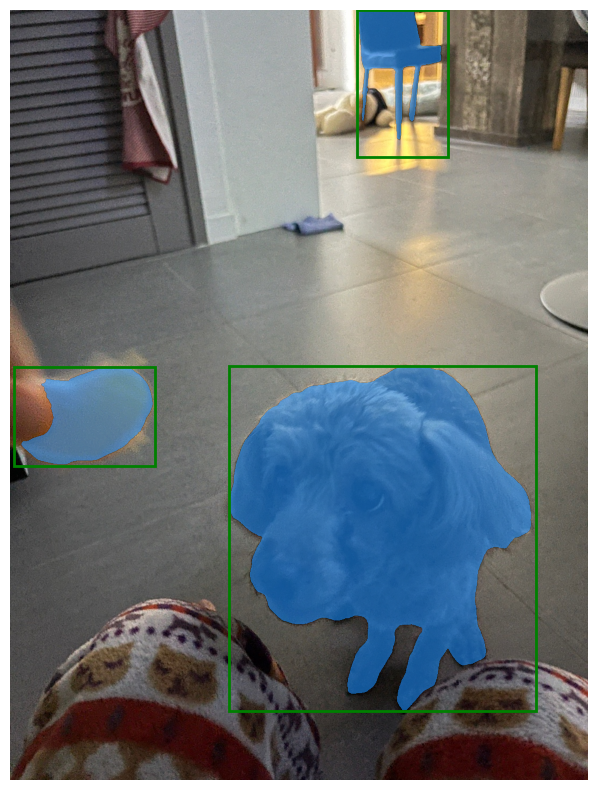

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)

for i, mask_info in enumerate(all_masks):
    show_mask(mask_info['masks'], plt.gca())
    show_box(input_boxes[i], plt.gca())

plt.axis('off')
#plt.show()

(-0.5, 1079.5, 1439.5, -0.5)

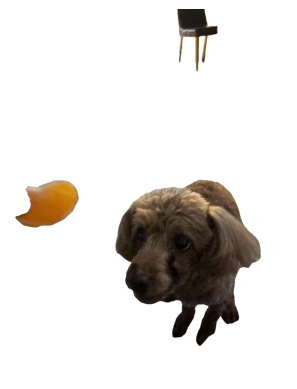

In [ ]:
white_background = np.ones_like(image) * 255
overlay_image = white_background.copy()

for mask_info in all_masks:
    segmentation_mask = mask_info['masks']
    binary_mask = np.where(segmentation_mask > 0.5, 1, 0)
    overlay_image = overlay_image * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

plt.imshow(overlay_image.astype(np.uint8))
plt.axis('off')
#plt.show()

### extract all masks contour

In [ ]:
## all_contour 사용

all_contours = []
for mask_info in all_masks:
    mask_uint8 = mask_info['masks'].astype(np.uint8) * 255

    # CHAIN_APPROX_SIMPLE
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # CONTOUR 찾기
    for contour in contours:
        epsilon = 0.0001 * cv2.arcLength(contour, True)
        approx_contour = cv2.approxPolyDP(contour, epsilon, True)

        # list 담고
        all_contours.append({
            'index': mask_info['index'],
            'class_name': mask_info['class_name'],
            'class_index': mask_info['class_index'],
            'bounding_box': mask_info['bounding_box'],
            'contour_coordinates': approx_contour.squeeze().tolist(),
        })

import copy

#합치기
concat_contours = []
concat_index = []
for j in all_contours:
  i = copy.deepcopy(j)
  if i['index'] not in concat_index:
    concat_index.append(i['index'])
    if type(i['contour_coordinates'][0]) == int:
      temp = i
      temp['contour_coordinates'] = [i['contour_coordinates']]
      concat_contours.append(temp)
    else:
      concat_contours.append(i)
  else:
    if type(i['contour_coordinates'][0]) == int:
      concat_contours[i['index']]['contour_coordinates'].append(i['contour_coordinates'])
    else:
      concat_contours[i['index']]['contour_coordinates'] += i['contour_coordinates']

for contour_info in all_contours:
    coordinates = contour_info['contour_coordinates']
    coordinates_int = [tuple(map(int, coord)) for coord in coordinates] if isinstance(coordinates[0], list) else tuple(map(int, coordinates))

    if isinstance(coordinates[0], list):
        cv2.polylines(image, [np.array(coordinates_int, dtype=np.int32)], isClosed=True, color=(255, 255, 255), thickness=2)
    else:
        cv2.circle(image, coordinates_int, radius=2, color=(255, 255, 255), thickness=2)

#cv2_imshow(image)

## **Part3. Depth**

### 매리골드 잘 안되면 여기부터 돌리기 (depth_bw 올려주셔야 합니다)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

'''
name = 'kitchen'
#file_path = f'/content/mmdetection/Marigold/output/depth_bw/{name}_pred.png'
file_path ='/content/'+name+'_pred.png'
img = Image.open(file_path)
im = img.load()
'''

# img name은 맨 위에서 디렉토리 내에 잇는 이미지 filename만 빼온 거
# 마리골드 연결되면 이거 써야 함 file_path = f'/content/mmdetection/Marigold/output/depth_bw/{img_name}_pred.png'
file_path ='/content/sample_data/'+specific_name+'_depth_16bit.png'
img = Image.open(file_path)
im = img.load()


# Normalize 위한 Min/Max 구하기
minV = -1
maxV = -1

for i in range(img.size[0]):
    for j in range(img.size[1]):
        if minV == -1 or im[i,j] < minV:
            minV = im[i,j]
        if maxV == -1 or im[i,j] > maxV:
            maxV = im[i,j]

# depth image normalize
normalizedDepth = []

for j in range(img.size[1]):
    col = []
    for i in range(img.size[0]):
        col.append((im[i,j]-minV)/(maxV-minV))
    normalizedDepth.append(col)

pixels = np.array(normalizedDepth)
pixels_255 = 255 * (pixels)
im2 = Image.fromarray(pixels_255.astype(np.uint8), mode='L')
#im2.show()

In [ ]:
def depthRange(overlapping_boxes):
  depth_range = []
  for i in overlapping_boxes:
    index = i['index']

    min = -1
    max = -1
    for j in concat_contours[index]['contour_coordinates']:
      y, x = j
      y = y-1
      x = x-1
      if min == -1 or pixels_255[x, y] < min:
        min = pixels_255[x, y]
      if max == -1 or pixels_255[x, y] > max:
        max = pixels_255[x, y]
    depth_range.append({'index': i['index'], 'depth_range': [min, max]})
  return depth_range

In [ ]:
def depthOverlap(target, depth_range):
  overlap = []
  for i in depth_range:
    want = next((item for item in depth_range if item['index']==target), None)

    if i['index'] == target:
      continue
    else:
      minQ, maxQ = i['depth_range']
      minV, maxV = want['depth_range']

      if maxQ < minV or minQ > maxV:
        continue
      else:
        overlap.append({'index': i['index']})
  return overlap

In [ ]:
depth_range = depthRange(overlapping_boxes)
depth_overlap = depthOverlap(selected_index, depth_range) # 클릭한 인덱스 번호 넣어주기

print(depth_overlap)

[]


## **Part4. Text 유사도**

### CSV 파일에서 계산하기 (csv 업로드 해야함)

In [ ]:
import pandas as pd

# Read the csv file into a dataframe
cosineScores = pd.read_csv("/content/cosinescore.csv")

def similarity(key1, key2):
  result = cosineScores[(cosineScores["Word1"] == key1) & (cosineScores["Word2"] == key2) | (cosineScores["Word1"] == key2) & (cosineScores["Word2"] == key1)]
  # If there is a match, return the float value in the third column
  if len(result) > 0:
    return result["CosineSimilarity2"].iloc[0]
  # Otherwise, return None
  else:
    return 1

In [ ]:
attention = selected_index

sim = []
for i in concat_contours:
  similar = similarity(i["class_name"],concat_contours[attention]["class_name"])
  sim.append([concat_contours[attention]["class_name"], i['class_name'], similar])

print(len(sim))
print(sim)
print(attention)

3
[['dog', 'dog', 1], ['dog', 'frisbee', 0.418888509], ['dog', 'chair', 0.196575284]]
0


## **Part5. 거리 및 패턴 계산**

In [ ]:
#길이 계산
import math

def Distance2D(origin, target):
    xDistance = (origin[0] - target[0])/img.size[0]
    yDistance = (origin[1] - target[1])/img.size[1]
    distance2D = np.sqrt(xDistance**2 + yDistance**2)

    return distance2D

def Distance(origin, target):
    distance2D = Distance2D(origin, target)
    distnaceDepth = normalizedDepth[math.floor(origin[1])][math.floor(origin[0])] - normalizedDepth[math.floor(target[1])][math.floor(target[0])]
    distance = np.sqrt(distance2D**2 + distnaceDepth**2)

    return distance

In [ ]:
print(concat_contours[attention]['bounding_box'])

[409.8382568359375, 665.335693359375, 983.56005859375, 1309.6724853515625]


In [ ]:
final_contours = []
for i in concat_contours:  # concat_contours
  temp = i
  x = (i['bounding_box'][0]+i['bounding_box'][2])/2
  y = (i['bounding_box'][1]+i['bounding_box'][3])/2
  temp["box_center"] = [x, y]
  final_contours.append(temp)

In [ ]:
#중심객체 좌표
selected = final_contours[attention]

#유사/비유사 객체 좌표
similarObj = []
dissimilarObj = []
sameObj = []
for i in range(len(sim)):
    if sim[i][2] >= 0.9999:
        sameObj.append(final_contours[i])
    elif sim[i][2] >= 0.45:
        similarObj.append(final_contours[i])
    else:
        dissimilarObj.append(final_contours[i])

#중심좌표
center = [img.size[0]/2, img.size[1]/2]

print(len(similarObj))
print(len(sameObj))
print(len(dissimilarObj))

0
1
2


In [ ]:
print(len(normalizedDepth), len(normalizedDepth[0]))
print(math.floor(center[1]), math.floor(center[0]))
print(selected["class_name"])
print(math.floor(selected["box_center"][1]), math.floor(selected["box_center"][0]))
print(selected["box_center"])

1440 1080
720 540
dog
987 696
[696.6991577148438, 987.5040893554688]


In [ ]:
#거리 모음
simDistance = []
center2select = Distance(center, selected["box_center"])
center2Dselect = Distance2D(center, selected["box_center"])
center2sim = []
center2same = []

for i in range(len(similarObj)):
    distance = Distance(selected["box_center"], similarObj[i]["box_center"])
    simDistance.append(distance)
    distance = Distance(center, similarObj[i]["box_center"])
    center2sim.append(distance)

for i in range(len(sameObj)):
    distance = Distance2D(center, sameObj[i]["box_center"])
    center2same.append(distance)

print(len(center2same))

1


In [ ]:
from itertools import *

def Pattern(selected, similar):
  if len(similar) < 3:
    return []
  else:
    pattern = []
    new = similar
    cases = []
    for i in range(3, min(5, len(new))):
      cases += list(permutations(new, i))

    for i in cases:
        if i[0]["box_center"][0] < i[-1]["box_center"][0]:
            cases.remove(i)

    for i in cases:
        dist = []
        for j in range(len(i)-1):
            dist.append(Distance(i[j]["box_center"], i[j+1]["box_center"]))
        std = np.std(dist)

        #표준편차 0.1로 설정함. 변경 가능!!!
        if std < 0.07:
            pattern.append([element['index'] for element in i])

    return pattern

In [ ]:
#b.일정 패턴이  있다면 남긴다
pattern = Pattern(selected, sameObj)

#c.이미지 중앙에서 동일 거리에 있는 경우 남긴다
forC =[]
for i in range(len(center2sim)):
    if abs(center2sim[i]-center2select)/center2select < 0.07:
        forC.append(similarObj[i])

for i in range(len(center2same)):
    if abs(center2same[i]-center2Dselect)/center2Dselect < 0.15:
        forC.append(sameObj[i])

## **Part6. 최종 종합**

In [ ]:
# depth overlap
print(depth_overlap)

# similarObj
for i in similarObj:
  print(i['index'])

# pattern
"""
pattern = Pattern(selected, sameObj)
print(len(pattern))
for i in pattern:
  hi = []
  for j in i:
    hi.append(j)
  print(hi)
"""

# same distance
"""
forC =[]
for i in range(len(center2sim)):
    if abs(center2sim[i]-center2select)/center2select < 0.1:
        forC.append(similarObj[i])
for i in forC:
  print(i['index'])
"""

[]


"\nforC =[]\nfor i in range(len(center2sim)):\n    if abs(center2sim[i]-center2select)/center2select < 0.1:\n        forC.append(similarObj[i])\nfor i in forC:\n  print(i['index'])\n"

### select segmentation of specific index

In [ ]:
# 4가지 인덱스랑 all_masks 매칭시키기

# 우리가 보려고 하는 index
def findTargets(target_indices, lists):
  target_indices.append(selected['index'])
  for info_list in lists:
    for i in info_list:
      if i['index'] not in target_indices:
        target_indices.append(i['index'])
      else:
        continue

target_indices = []
lists = [depth_overlap, similarObj, forC]
findTargets(target_indices, lists)

# 최종으로 보려고 하는 인덱스+mask 정보가 담겨있는 리스트
filtered_all_masks = [info for info in all_masks if info['index'] in target_indices]

In [ ]:
filtered_all_masks

[{'index': 0,
  'class_name': 'dog',
  'class_index': 16,
  'bounding_box': [409.8382568359375,
   665.335693359375,
   983.56005859375,
   1309.6724853515625],
  'masks': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]])}]

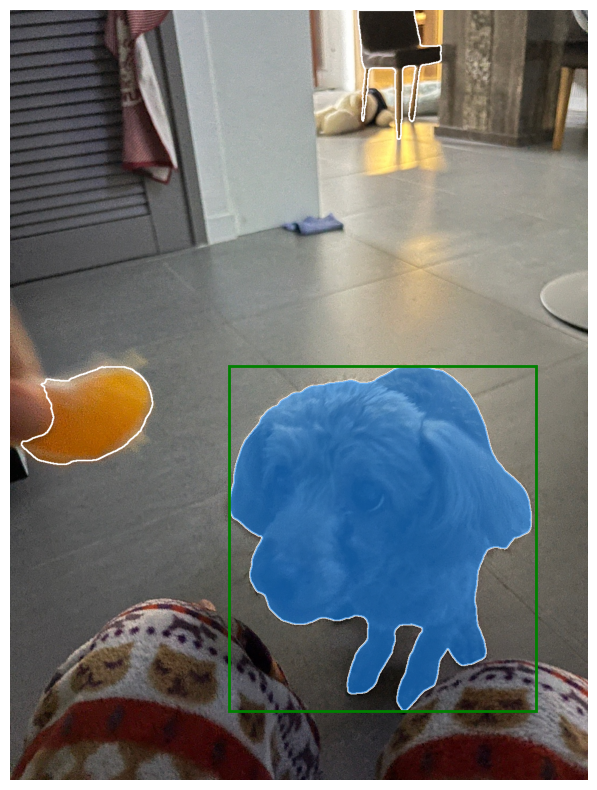

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)

for i, mask_info in enumerate(filtered_all_masks):
    show_mask(mask_info['masks'], plt.gca())
    show_box(input_boxes[i], plt.gca())

plt.axis('off')
plt.show()

# **결과**

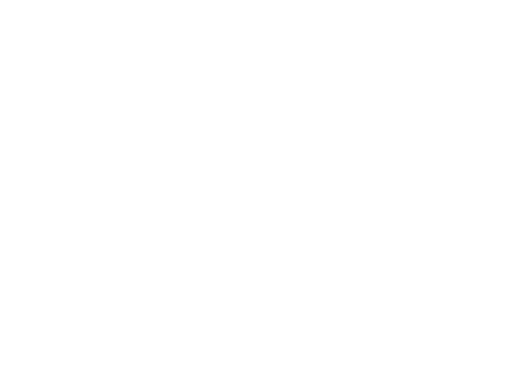

In [ ]:
#final_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
final_image = image
transparent_background = np.zeros((final_image.shape[0], final_image.shape[1], 4), dtype=np.uint8)

for mask_info in filtered_all_masks:
    segmentation_mask = mask_info['masks']
    binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

    transparent_background[binary_mask == 1, :3] = final_image[binary_mask == 1]

    # 알파 채널 설정
    transparent_background[binary_mask == 1, 3] = 255

#plt.imshow(transparent_background)
plt.axis('off')
#plt.show()

save_path = '/content/result_'+specific_name+'.png'
plt.imsave(save_path, transparent_background, format='png')